In [1]:
# imports
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import sys
import csv
import functools
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
import string
from vigipy import *
import unittest
from vigipy import bcpnn, gps, ror, rfet, prr, convert, LongitudinalModel

In [2]:
# creating a list of product names to use as an index
listProducts = '''BIOTRONIK_COROX_OTW
BIOTRONIK_KAINOX
BIOTRONIK_KENTROX
BIOTRONIK_KENTROX_STEROID
BIOTRONIK_LINOX
BIOTRONIK_LINOX_SMART
BIOTRONIK_LINOX_SMART_PROMRI
BIOTRONIK_LUMAX
BIOTRONIK_SELOX
BIOTRONIK_VIGILA_1
BIOTRONIK_VIGILA_2
BOS_SCI_ACUITY
BOS_SCI_EASYTRAK
BOS_SCI_EASYTRAK2
BOS_SCI_EASYTRAK3
BOS_SCI_ENDOTAK
BOS_SCI_ENDOTAK_ENDURANCE
BOS_SCI_ENDOTAK_DSP
BOS_SCI_ENDOTAK_RELIANCE
BOS_SCI_ENDOTAK_SQ
BOS_SCI_FINELINE
BOS_SCI_FLEXTEND
BOS_SCI_FLEXTEND2
BOS_SCI_INTERVENE
BOS_SCI_SELUTE
CAMERON_HEALTH_QTRAK
MEDTRONIC_ATTAIN
MEDTRONIC_CAPSURE
MEDTRONIC_EPICARDIAL_PATCH
MEDTRONIC_SELECTSECURE
MEDTRONIC_SPRINT
MEDTRONIC_SPRINT_QUATTRO
MEDTRONIC_SPRINT_QUATTRO_SECURE
MEDTRONIC_SPRINT_QUATTRO_SECURE_MRI
MEDTRONIC_SUBQ
MEDTRONIC_TRANSVENE
SORIN_ISOLINE
SORIN_SITUS
SORIN_STELID_II
SORIN_STELIX_II
STJUDE_DURATA
STJUDE_QUARTET
STJUDE_QUICKFLEX
STJUDE_QUICKSITE
STJUDE_RIATA_ST_OPTIM
STJUDE_SPL
STJUDE_TENDRIL
STJUDE_TVL
STJUDE_TVL_ADX
MEDTRONIC_SPRINT_FIDELIS
STJUDE_RIATA
STJUDE_RIATA_ST'''.split()
print(len(listProducts))

52


In [3]:
dfRaw = pd.read_pickle('./df4DPA.pkl')

In [4]:
# creating df to input into the DPA model
df = pd.DataFrame(columns=["AE"])
df["AE"] = dfRaw["Pred"]

countList = []
n=0
while n < 37190:
    countList.append(1)
    n += 1

df["count"] = countList
df["name"] = dfRaw["STD_DEVICE"]
df["date"] = dfRaw["DATE_RECEIVED"].astype(str)
df["date"] = df["date"].str.replace(pat="-", repl="/")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37190 entries, 0 to 37189
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AE      37190 non-null  object
 1   count   37190 non-null  int64 
 2   name    37190 non-null  object
 3   date    37190 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None


In [6]:
df

,AE,count,name,date
0,1,1,MEDTRONIC_SPRINT_FIDELIS,2006/05/10
1,1,1,STJUDE_RIATA_ST,2010/11/10
2,0,1,BOS_SCI_ENDOTAK_ENDURANCE,2001/08/14
3,0,1,STJUDE_RIATA,2007/03/09
4,1,1,BOS_SCI_ENDOTAK_RELIANCE,2008/02/07
...,...,...,...,...
37185,0,1,STJUDE_QUICKFLEX,2011/09/09
37186,0,1,STJUDE_RIATA,2007/11/09
37187,1,1,BOS_SCI_ENDOTAK_ENDURANCE,2005/02/10
37188,1,1,STJUDE_RIATA_ST,2009/07/09


In [27]:
# DPA
LM2 = LongitudinalModel(df, 'Q')
LM2.run(bcpnn, False, decision_metric='rank', ranking_statistic="p_value")

for timestamp, result in LM2.results:
    print("Signals produced prior to {0}:".format(timestamp))
    #print(result.signals.head())
    print(result.signals)
    
    
print(len(LM2.results))

Signals produced prior to 2000-03-31 00:00:00:
Empty DataFrame
Columns: [Product, Adverse Event, Count, Expected Count, posterior_prob, count/expected, product margin, event margin, FDR, FNR, Se, Sp]
Index: []
Signals produced prior to 2000-06-30 00:00:00:
Empty DataFrame
Columns: [Product, Adverse Event, Count, Expected Count, posterior_prob, count/expected, product margin, event margin, FDR, FNR, Se, Sp]
Index: []
Signals produced prior to 2000-09-30 00:00:00:
Empty DataFrame
Columns: [Product, Adverse Event, Count, Expected Count, posterior_prob, count/expected, product margin, event margin, FDR, FNR, Se, Sp]
Index: []
Signals produced prior to 2000-12-31 00:00:00:
Empty DataFrame
Columns: [Product, Adverse Event, Count, Expected Count, posterior_prob, count/expected, product margin, event margin, FDR, FNR, Se, Sp]
Index: []
Signals produced prior to 2001-03-31 00:00:00:
Empty DataFrame
Columns: [Product, Adverse Event, Count, Expected Count, posterior_prob, count/expected, product 

In [28]:
LM2.results[55][1].all_signals

,Product,Adverse Event,Count,Expected Count,posterior_prob,count/expected,product margin,event margin,FDR,FNR,Se,Sp
0,BOS_SCI_ENDOTAK_RELIANCE,0,3151.0,2461.323474,1.035376e-29,1.280206,5426.0,16870.0,0.242308,0.506348,0.337602,0.781756
1,STJUDE_RIATA,1,7127.0,6323.841893,6.035994e-18,1.127005,11574.0,20320.0,0.535977,0.648694,0.889038,0.059777
2,MEDTRONIC_SPRINT_QUATTRO,0,983.0,743.477548,1.915926e-12,1.322165,1639.0,16870.0,0.282150,0.581141,0.543744,0.539432
3,MEDTRONIC_SPRINT_FIDELIS,1,2054.0,1754.437214,6.798806e-09,1.170746,3211.0,20320.0,0.511337,0.752729,0.827381,0.102120
4,STJUDE_RIATA_ST,1,2387.0,2113.411132,8.887941e-07,1.129454,3868.0,20320.0,0.529816,0.560940,0.911316,0.059771
...,...,...,...,...,...,...,...,...,...,...,...,...
86,STJUDE_TVL_ADX,0,29.0,89.816080,1.000000e+00,0.322882,198.0,16870.0,0.368372,0.722437,0.689509,0.274490
87,MEDTRONIC_SPRINT_FIDELIS,0,1157.0,1456.562786,1.000000e+00,0.794336,3211.0,16870.0,0.290700,0.579540,0.521466,0.550529
88,MEDTRONIC_SPRINT_QUATTRO,1,656.0,895.522452,1.000000e+00,0.732533,1639.0,20320.0,0.517683,0.766262,0.827381,0.092649
89,BOS_SCI_ENDOTAK_RELIANCE,1,2275.0,2964.676526,1.000000e+00,0.767369,5426.0,20320.0,0.480619,0.750958,0.763681,0.156702


In [29]:
# creating a df to make a heatmap out of
dfResults = pd.DataFrame(index=listProducts)
dfResults["productNames"] = listProducts
dfResults.head()

,productNames
BIOTRONIK_COROX_OTW,BIOTRONIK_COROX_OTW
BIOTRONIK_KAINOX,BIOTRONIK_KAINOX
BIOTRONIK_KENTROX,BIOTRONIK_KENTROX
BIOTRONIK_KENTROX_STEROID,BIOTRONIK_KENTROX_STEROID
BIOTRONIK_LINOX,BIOTRONIK_LINOX


In [30]:
n = 0
while n < 56:
    dfResults = dfResults.merge(LM2.results[n][1].signals[["Product", "posterior_prob"]], how="outer",
                            left_on="productNames", right_on="Product")
    dfResults[str(n)] = dfResults["posterior_prob"]
    dfResults = dfResults.drop(columns=["Product", "posterior_prob"], axis = 1)
    n += 1

In [31]:
dfResults4HM = dfResults.set_index("productNames")
dfResults4HM = dfResults4HM.iloc[:52]
dfResults4HM.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
productNames,,,,,,,,,,,,,,,,,,,,,
BIOTRONIK_COROX_OTW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIOTRONIK_KAINOX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIOTRONIK_KENTROX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIOTRONIK_KENTROX_STEROID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIOTRONIK_LINOX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004104,0.0023,0.001911,0.001522,0.001609,0.001397,0.000993,0.000635,0.000615,0.000289


In [32]:
tmstmps = []
for timestamp, result in LM2.results:
    tmstmps.append(str(timestamp))
print(len(tmstmps))

56


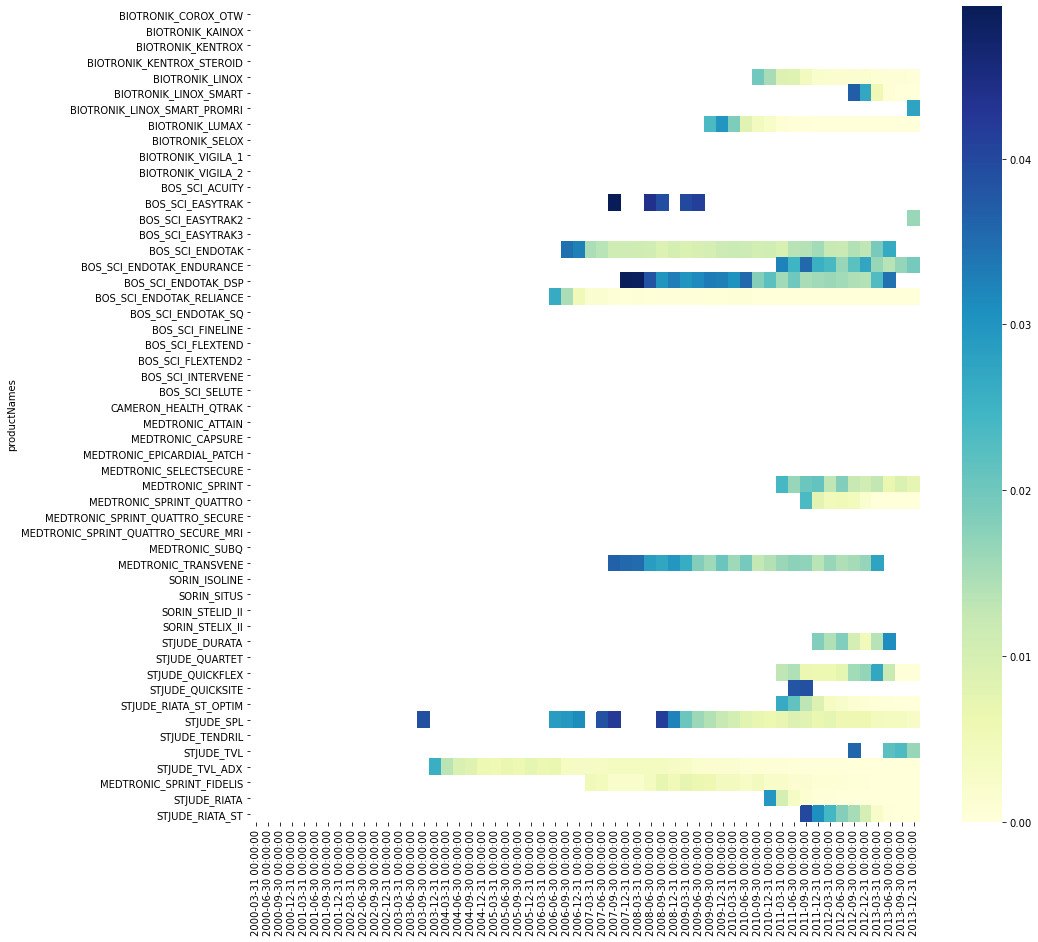

In [33]:
# plotting the Q_0.025(log(IC))
plt.figure(figsize=(15,15))
ax = sns.heatmap(dfResults4HM, cmap="YlGnBu").set_xticklabels(tmstmps)

In [34]:
# make a heatmap of counts
dfResults = pd.DataFrame(index=listProducts)
dfResults["productNames"] = listProducts
dfResults.head()

n = 0
while n < 56:
    dfResults = dfResults.merge(LM2.results[n][1].signals[["Product", "Count"]], how="outer",
                            left_on="productNames", right_on="Product")
    dfResults[str(n)] = dfResults["Count"]
    dfResults = dfResults.drop(columns=["Product", "Count"], axis = 1)
    n += 1

dfResults4HM = dfResults.set_index("productNames")
dfResults4HM = dfResults4HM.iloc[:52]
dfResults4HM.head()

tmstmps = []
for timestamp, result in LM2.results:
    tmstmps.append(str(timestamp))
print(len(tmstmps))

56


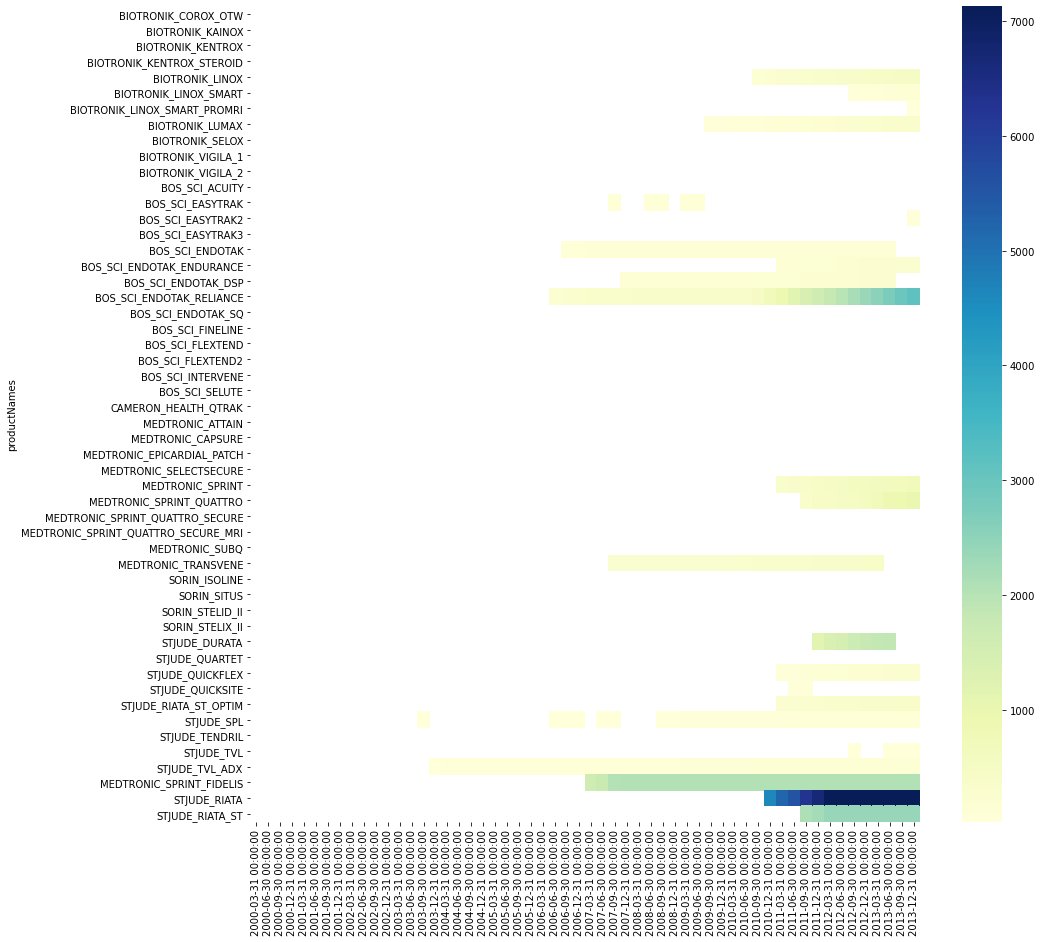

In [35]:
# plotting the Q_0.025(log(IC))
plt.figure(figsize=(15,15))
ax = sns.heatmap(dfResults4HM, cmap="YlGnBu").set_xticklabels(tmstmps)

In [ ]:
# Sprint Fidelis recalled on October 25,2007
# Riata/Riata ST recalled on November 28, 2011